<a href="https://colab.research.google.com/github/aranlemaur/Big-Data/blob/main/WIP_Project_Practice_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Q. Define the problem domain

In [ ]:
# This is a stop and search (City of London) dataset

### Q. Identify candidate questions for your machine learning project

In [ ]:
# What kind of Object of search has the worst Outcome linked to object of search?
# How does age affect Outcome linked to object of search?

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/aranlemaur/Big-Data/main/city-of-london-stop-and-search.csv')
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2016-10-01T13:16:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False
1,Person search,2016-10-01T22:30:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,False
2,Person and Vehicle search,2016-10-02T00:15:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,False,False
3,Person and Vehicle search,2016-10-02T00:15:00+00:00,NaN,NaN,NaN,NaN,Female,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,False
4,Person and Vehicle search,2016-10-04T13:05:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,True,False


### Q. Generate a descriptive statistics report for the columns in your dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679 entries, 0 to 4678
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Type                                      4679 non-null   object
 1   Date                                      4679 non-null   object
 2   Part of a policing operation              35 non-null     object
 3   Policing operation                        35 non-null     object
 4   Latitude                                  2398 non-null   object
 5   Longitude                                 2398 non-null   object
 6   Gender                                    4620 non-null   object
 7   Age range                                 4394 non-null   object
 8   Self-defined ethnicity                    4423 non-null   object
 9   Officer-defined ethnicity                 4415 non-null   object
 10  Legislation                               4635 n

In [ ]:
# columns 2 and 3 are not relevant as there are too few details.
# latitude and longitude can be dropped as there are no in the scope of my analysis.
# regarding other missing values, I will analyse if they can be dropped.

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
 # I am dropping the Part of a policing operation and Policing operation columns because the amount on data in them is too low.
 # I am assuming that the data in these two columns are missing at random (MAR).
 # As for the Outcome linked to object of search, there are some NaN values, which correlate to the Nothing found - no further action object in the Outcome column.
 # The probability of these values being missing is the same for all cases, therefore I assume the data are missing completely at random (MCAR).

In [14]:
df.drop(['Part of a policing operation', 'Policing operation', 'Latitude', 'Longitude'], axis=1, inplace=True)
df.head()

,Type,Date,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2016-10-01T13:16:00+00:00,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False
1,Person search,2016-10-01T22:30:00+00:00,Male,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,False
2,Person and Vehicle search,2016-10-02T00:15:00+00:00,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,False,False
3,Person and Vehicle search,2016-10-02T00:15:00+00:00,Female,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,NaN,False
4,Person and Vehicle search,2016-10-04T13:05:00+00:00,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,True,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679 entries, 0 to 4678
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Type                                      4679 non-null   object
 1   Date                                      4679 non-null   object
 2   Gender                                    4620 non-null   object
 3   Age range                                 4394 non-null   object
 4   Self-defined ethnicity                    4423 non-null   object
 5   Officer-defined ethnicity                 4415 non-null   object
 6   Legislation                               4635 non-null   object
 7   Object of search                          4587 non-null   object
 8   Outcome                                   4411 non-null   object
 9   Outcome linked to object of search        4169 non-null   object
 10  Removal of more than just outer clothing  4602 n

In [16]:
# check for cardinality
for cname in df.columns:
  print(cname + " : " + str(df[cname].value_counts().count()))

Type : 4
Date : 4447
Gender : 4
Age range : 5
Self-defined ethnicity : 35
Officer-defined ethnicity : 5
Legislation : 9
Object of search : 12
Outcome : 16
Outcome linked to object of search : 3
Removal of more than just outer clothing : 3


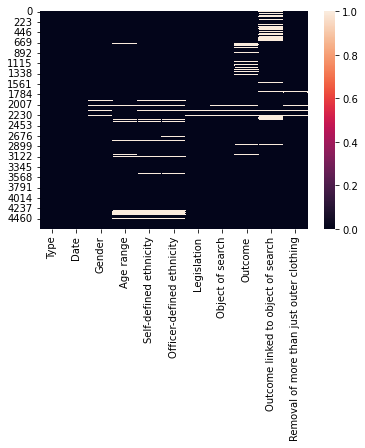

In [17]:
# checking for null values - plot them
sns.heatmap(df.isnull())
plt.show()

In [19]:
# changing NaN to 0 in the Outcome linked to object of search

df['Outcome linked to object of search'] = df['Outcome linked to object of search'].fillna(0)

In [52]:
df.head()

,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Object of search,Outcome,Outcome linked to object of search
0,Person search,Male,18-24,Black or Black British - African (B2),White,Controlled drugs,Offender given drugs possession warning,True
1,Person search,Male,25-34,White - Any other White ethnic background (W9),White,Controlled drugs,Nothing found - no further action,0
2,Person and Vehicle search,Male,18-24,Black or Black British - African (B2),Black,Controlled drugs,Suspect summonsed to court,False
3,Person and Vehicle search,Female,18-24,Black or Black British - African (B2),Black,Controlled drugs,Nothing found - no further action,0
4,Person and Vehicle search,Male,18-24,White - Any other White ethnic background (W9),White,Controlled drugs,Suspect arrested,True


In [20]:
df['Outcome linked to object of search'] = df['Outcome linked to object of search'].replace({True: 1, False: 0}) # Not working!

In [21]:
df.head()

,Type,Date,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2016-10-01T13:16:00+00:00,Male,18-24,Black or Black British - African (B2),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Offender given drugs possession warning,True,False
1,Person search,2016-10-01T22:30:00+00:00,Male,25-34,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,0,False
2,Person and Vehicle search,2016-10-02T00:15:00+00:00,Male,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect summonsed to court,False,False
3,Person and Vehicle search,2016-10-02T00:15:00+00:00,Female,18-24,Black or Black British - African (B2),Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Nothing found - no further action,0,False
4,Person and Vehicle search,2016-10-04T13:05:00+00:00,Male,18-24,White - Any other White ethnic background (W9),White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Suspect arrested,True,False


In [22]:
df.drop(columns=["Date", "Legislation", "Removal of more than just outer clothing"], inplace = True)

In [23]:
df.head()

,Type,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Object of search,Outcome,Outcome linked to object of search
0,Person search,Male,18-24,Black or Black British - African (B2),White,Controlled drugs,Offender given drugs possession warning,True
1,Person search,Male,25-34,White - Any other White ethnic background (W9),White,Controlled drugs,Nothing found - no further action,0
2,Person and Vehicle search,Male,18-24,Black or Black British - African (B2),Black,Controlled drugs,Suspect summonsed to court,False
3,Person and Vehicle search,Female,18-24,Black or Black British - African (B2),Black,Controlled drugs,Nothing found - no further action,0
4,Person and Vehicle search,Male,18-24,White - Any other White ethnic background (W9),White,Controlled drugs,Suspect arrested,True


In [25]:
df = df.dropna() # dropping NA in all tables, which represents 15% of data in total

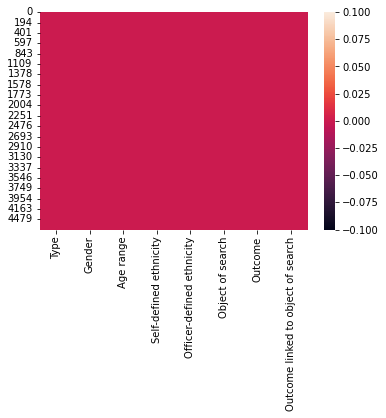

In [26]:
sns.heatmap(df.isnull())
plt.show()

In [24]:
print(f"Unique FN: {df['Age range'].unique()}")

Unique FN: ['18-24' '25-34' 'over 34' '10-17' nan 'Age range']


In [ ]:
# Problem 1 : converting all True and False values to 1 and 0 in 'Outcome linked to object of search' column
# Problem 2 : converting that column to number?
# Problem 3 : converting 'Age range' column to number.
# Question I want to answer : How does the 'Age range' affect the possibility of being charged, that is 1/0 in 'Outcome linked to object of search' column

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/